In [2]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [1]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

from joblib import dump, load

# Loading Raw Data

In [3]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [5]:
x_train_flatten.shape, y_train.shape

((60000, 784), (60000,))

In [6]:
x_test_flatten.shape, y_test.shape

((10000, 784), (10000,))

In [32]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [34]:
len(x_train_list)

10

# Standardization

In [8]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [28]:
Xbar, _, _ = normalize(x_train_flatten)
Xbar.shape

(60000, 784)

In [45]:
a = x_train_0[:30*9, :]

for i in range(9):
  a = np.concatenate((a, x_train_list[i+1][:30, :]), axis=0)

a.shape

(540, 784)

In [46]:
Xbar, _, _ = normalize(a)
print(Xbar.shape)

num_component = 64
pca = PCA(n_components=num_component, svd_solver='full')
pca.fit(a)

(540, 784)


PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17762916, 0.27856417, 0.34118762, 0.38829235, 0.42912746,
       0.466286  , 0.49948743, 0.5284759 , 0.55412375, 0.5768174 ,
       0.59645662, 0.61307113, 0.62920899, 0.64366898, 0.65745159,
       0.67079296, 0.68319594, 0.69475777, 0.70550682, 0.71550458,
       0.72526266, 0.73450645, 0.74313578, 0.75135008, 0.75903408,
       0.76631417, 0.77324666, 0.77982419, 0.78615543, 0.79224031,
       0.79804662, 0.80348863, 0.8086256 , 0.81374149, 0.81867328,
       0.82326386, 0.82770415, 0.83198021, 0.8361121 , 0.83993558,
       0.84365806, 0.84722558, 0.85069426, 0.85393472, 0.85709596,
       0.86022393, 0.86326137, 0.8661974 , 0.86899789, 0.87177294,
       0.8743993 , 0.8770086 , 0.87947925, 0.88186743, 0.88413319,
       0.88636706, 0.88856077, 0.89066503, 0.89273597, 0.89470856,
       0.89661831, 0.89850909, 0.90034986, 0.90215219])

In [ ]:
def obtain_PCA_model(num_component, Xbar):
    pca = PCA(n_components=num_component, svd_solver='full')
    pca.fit(Xbar)
    return pca

In [ ]:
model = obtain_PCA_model(4, x_train_flatten)

x_train_transform = model.transform(x_train_flatten)
x_test_transform = model.transform(x_test_flatten)

print(x_train_transform.shape, x_test_transform.shape)

(60000, 4) (10000, 4)


In [ ]:
# save PCA model

dump(model, './Dataset One-vs-All/PCA_model_4features.joblib')

['./Dataset One-vs-All/PCA_model_4features.joblib']

In [ ]:
def data_sepparation(X_data, Y_data, max_sample):
    label, frequency = np.unique(Y_data, return_counts=True)
    X_sepparate = []
    Y_sepparate = []
    
    for i in range (len(label)):
        temp_X = np.zeros((frequency[i], len(X_data[0,:])))
        temp_Y = np.zeros((frequency[i], ))
        count = 0
        for j in range (len(Y_data)):
            if label[i] == Y_data[j]:
                temp_X[count, :] = X_data[j, :]
                temp_Y[count] = label[i]
                count += 1
        X_sepparate += [temp_X[:max_sample, :]]
        Y_sepparate += [temp_Y[:max_sample]]
    
    return X_sepparate, Y_sepparate

In [ ]:
def data_one_vs_all(label, X_data, Y_data, max_total_sample):
    X_sepparate, Y_sepparate = data_sepparation(X_data, Y_data, int(max_total_sample/2))
    
    X_new = X_sepparate[label].copy()
    for i in range (10):
        if i == label:
            pass
        else:
            X_new = np.concatenate((X_new, X_sepparate[i][:int(max_total_sample/(2*(10-1))), :]), axis=0)
            
    return X_new

In [ ]:
504*2

1008

In [ ]:
x_train_one_vs_all = data_one_vs_all(0, x_train_transform, y_train, 504*2)
x_test_one_vs_all = data_one_vs_all(0, x_test_transform, y_test, 108*2)

print(x_train_one_vs_all.shape, x_test_one_vs_all.shape)

(1008, 4) (216, 4)


In [ ]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt, loadtxt

def save_to_csv(data, file_name):
    # save to csv file
    savetxt('./' + file_name, data, delimiter=',')
    
def load_from_csv(file_name):
    # load from csv file
    return loadtxt('./' + file_name, delimiter=',')

In [ ]:
save_to_csv(x_train_one_vs_all, "./Dataset One-vs-All/x_train_4features_0.txt")
save_to_csv(x_test_one_vs_all, "./Dataset One-vs-All/x_test_4features_0.txt")

In [ ]:
def data_sepparation_new(X_data, Y_data, max_sample):
    label, frequency = np.unique(Y_data, return_counts=True)
    X_sepparate = []
    Y_sepparate = []
    
    for i in range (len(label)):
        temp_X = np.zeros((frequency[i], len(X_data[0,:])))
        temp_Y = np.zeros((frequency[i], ))
        count = 0
        for j in range (len(Y_data)):
            if label[i] == Y_data[j]:
                temp_X[count, :] = X_data[j, :]
                temp_Y[count] = label[i]
                count += 1
        X_sepparate += [temp_X[:max_sample, :]]
        Y_sepparate += [temp_Y[:max_sample]]
        
    X_new = X_sepparate[0].copy()
    Y_new = Y_sepparate[0].copy()
    for i in range (len(label)-1):
        X_new = np.concatenate((X_new, X_sepparate[i+1]), axis=0)
        Y_new = np.concatenate((Y_new, Y_sepparate[i+1]))
    
    return X_new, Y_new

In [ ]:
x_train_flatten, y_train = data_sepparation_new(x_train_flatten, y_train, 50)
x_test_flatten, y_test = data_sepparation_new(x_test_flatten, y_test, 10)

print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(500, 784) (500,)
(100, 784) (100,)


In [ ]:
def normalize(X):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = (X - mu)/std_filled
    return Xbar


In [ ]:
def obtain_PCA_model(num_component, Xbar):
    pca = PCA(n_components=num_component, svd_solver='full')
    pca.fit(Xbar)
    return pca

In [ ]:
model = obtain_PCA_model(4, x_train_flatten)
x_train_transform = model.transform(x_train_flatten)

print(x_train_transform.shape, y_train.shape)

(500, 4) (500,)


In [ ]:
# save PCA model

dump(model, './Dataset One-vs-All/PCA_model_4features.joblib')

['./Dataset One-vs-All/PCA_model_4features.joblib']

In [ ]:
# load PCA model

clf = load('./Dataset One-vs-All/PCA_model_4features.joblib')

In [ ]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt, loadtxt

def save_to_csv(data, file_name):
    # save to csv file
    savetxt('./' + file_name, data, delimiter=',')
    
def load_from_csv(file_name):
    # load from csv file
    return loadtxt('./' + file_name, delimiter=',')

In [ ]:
save_to_csv(x_train_transform, "./Dataset One-vs-All/x_train_transform_4features.txt")
save_to_csv(y_train, "./Dataset One-vs-All/y_train.txt")

In [ ]:
x_test_transform = model.transform(x_test_flatten)

print(x_test_transform.shape, y_test.shape)

(100, 4) (100,)


In [ ]:
save_to_csv(x_test_transform, "./Dataset One-vs-All/x_test_transform_4features.txt")
save_to_csv(y_test, "./Dataset One-vs-All/y_test.txt")

In [ ]:
def label_one_vs_all(Y, label_one):
    Y_new = np.zeros((len(Y),))
    
    for i in range (len(Y)):
        if Y[i] == label_one:
            Y_new[i] = 1
        else:
            Y_new[i] = -1
            
    return Y_new

In [ ]:
np.unique(y_train, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50], dtype=int64))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int64))

In [ ]:
label = 9

Y_train_new = label_one_vs_all(y_train, label)
Y_test_new = label_one_vs_all(y_test, label)

In [ ]:
np.unique(Y_train_new, return_counts=True)

(array([-1.,  1.]), array([450,  50], dtype=int64))

In [ ]:
np.unique(Y_test_new, return_counts=True)

(array([-1.,  1.]), array([90, 10], dtype=int64))

In [ ]:
save_to_csv(Y_train_new, "./Dataset One-vs-All/y_train_" + str(label) + "_vs_all.txt")

In [ ]:
save_to_csv(Y_test_new, "./Dataset One-vs-All/y_test_" + str(label) + "_vs_all.txt")

In [ ]:
x_train_sepparate = data_sepparation(x_train_flatten, y_train)

In [ ]:
x_test_sepparate = data_sepparation(x_test_flatten, y_test)

In [ ]:
def dataset_pair_formation(label_1, label_2, X_sepparate):
    X = np.concatenate((X_sepparate[label_1], X_sepparate[label_2]), axis=0)
    return X

In [ ]:
def dataset_one_vs_all(label, X_sepparate):
    n_one = X_sepparate[label].shape[0]
    y_one = np.ones(n_one)
    
    X_all = X_sepparate.copy()
    X_all.pop(label)
    
    X = X_sepparate[label]
    n_all = 0
    for i in range (len(X_all)):
        n_all += X_all[i].shape[0]
        X = np.concatenate((X, X_all[i]), axis=0)
    y_all = np.ones(n_all) - 2
    y = np.concatenate((y_one, y_all))
    
    return X, y

In [ ]:
X, y = dataset_one_vs_all(0, x_train_sepparate)

print(X.shape, y.shape)

(60000, 784) (60000,)


In [ ]:
c1 = 0
c0 = 0
for i in range (len(y)):
    if y[i] == 1:
        c1 += 1
    else:
        c0 += 1
        
print(c1, c0)

5923 54077


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [ ]:
Xbar_0_1_train = dataset_pair_formation(0, 1, x_train_sepparate)

In [ ]:
a = np.unique(y_train, return_counts=True)[1]

In [ ]:
Xbar_0_1_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model = obtain_PCA_model(4, x_train_flatten)

In [ ]:
# save PCA model

dump(model, './PCA_model_0_1.joblib')

['./PCA_model_0_1.joblib']

In [ ]:
# load PCA model

clf = load('./PCA_model_0_1.joblib')

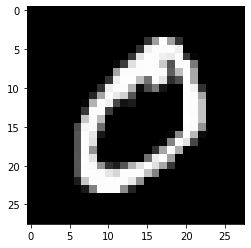

In [ ]:
plt.imshow(x_train_sepparate[0][0,:].reshape(28,28), cmap='gray')

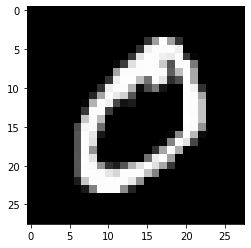

In [ ]:
plt.imshow(Xbar_0_1_train[0,:].reshape(28,28), cmap='gray')

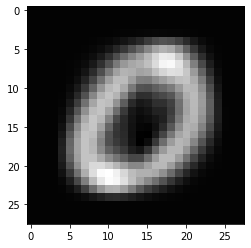

In [ ]:
plt.imshow(model.inverse_transform(model.transform(Xbar_0_1_train[0,:].reshape(1,-1))).reshape(28,28), cmap='gray')

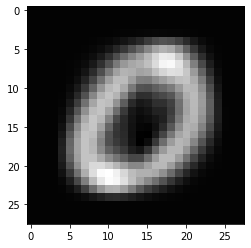

In [ ]:
plt.imshow(clf.inverse_transform(clf.transform(Xbar_0_1_train[0,:].reshape(1,-1))).reshape(28,28), cmap='gray')

In [ ]:
test = 10009

np.isclose(clf.transform(Xbar_0_1_train[test,:].reshape(1,-1)), model.transform(Xbar_0_1_train[test,:].reshape(1,-1)))

array([[ True,  True]])